In [1]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 7.8 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np 
import pandas as pd 
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline


In [2]:
import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

In [3]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split 
from src.utils.extract_data import *
from src.utils.metrics_plot import *
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean


In [5]:
transform_parquet_to_csv(os.path.join(project_dir,'dataset2.parquet'),os.path.join(project_dir,'dataset.csv'))

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
song_index,,,,,,,,,,,,,,,,,,,,,
195,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
417,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
530,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
909,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
1257,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
49589,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
49689,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504


In [4]:
df=pd.read_csv(os.path.join(project_dir,'dataset.csv'))
X,Y=extract_values_array(df,p=1,audio=True,usage=True)
l=list(df.columns[0:22])
l.remove('song_index')

In [7]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

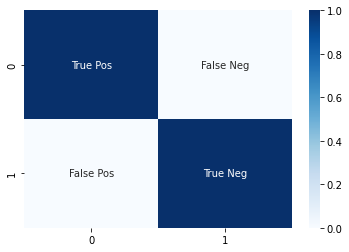

In [8]:
labels = ["True Pos","False Neg","False Pos","True Neg"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.eye(2), annot=labels, fmt="", cmap='Blues')
plt.savefig('Modèle Matrice de Confusion')

In [10]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

In [11]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [12]:
X_train, X_test, y_train,y_test = train_test_split(X, Y, train_size=0.7, random_state=88)

In [15]:
i=0
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
auc_labels=[]
params = {
        'eta': 0.3,
        'objective': 'binary:logistic',
        'gamma': 0.01,
        'max_depth': 8,
    }
for label in l:
    Y_train,Y_test = y_train[:,i],y_test[:,i]
    xgtrain = xgb.DMatrix(X_train, Y_train)
    xgtest = xgb.DMatrix(X_test)
    filename =os.path.join(project_dir,'docs/XGB/joblib_XGB2/'+label+'.json')
    if not os.path.exists(filename):
        bst=xgb.train(dtrain=xgtrain,params=params)
        bst.save_model(filename)
    else:
        bst = xgb.Booster()
        bst.load_model(filename)
    y_hat_2=bst.predict(xgtest)
    y_hat = (y_hat_2)>0.5*1
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' XGB'
    name_fig=os.path.join(project_dir,'docs/XGB/ROC/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1

<Figure size 432x288 with 0 Axes>

In [17]:
y_true=df_test.values
y_pred=df_hat.values
r=all_metrics(y_true,y_pred)
final_res.loc['XGB']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
XGB,0.749,0.904,0.799,0.849,0.016


##### CM

In [18]:
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/XGB/CM_XGB/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

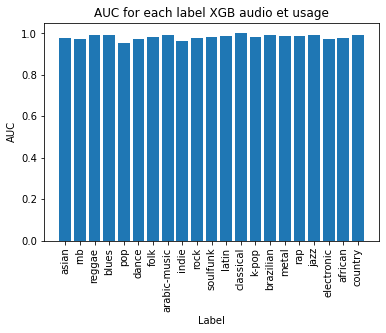

In [19]:
name=os.path.join(project_dir,'docs/XGB/ROC/AUC')
graph_auc(auc_labels,'XGB audio et usage',save=True,name_fig=name)


### TUNNING POUR INDIE

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y[:,8], train_size=0.8, random_state=88)

on trouve les paramètres suivant: \
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1000}

In [6]:
xgb_hyper=XGBClassifier(objective='binary:logistic', colsample_bytree= 0.7, gamma= 0.0, 
                                learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1000)

In [7]:
xgb_hyper.fit(X_train,y_train)
y_hat=xgb_hyper.predict(X_test)
y_hat_2=xgb_hyper.predict_proba(X_test)

In [19]:
y_hat_2=y_hat_2[:,1]


In [22]:
name_fig=os.path.join(project_dir,'docs/XGB/ROC/'+'indie_tunned')
plot_roc_curve(y_test,y_hat_2,'ROC tunned XGB indie ',save=True,name_fig=name_fig)



0.9793331201616882

<Figure size 432x288 with 0 Axes>

In [52]:
#avant tuning
print('accuracy',accuracy_score(y_test,y_hat_2))
print('precision', precision_score(y_test,y_hat_2))
print('recall', recall_score(y_test,y_hat_2))
print('f1 score', f1_score(y_test,y_hat_2))

accuracy 0.9707307426085237
precision 0.7827298050139275
recall 0.56312625250501
f1 score 0.6550116550116549


Comparons aux résultats précédents:

In [24]:
filename =os.path.join(project_dir,'docs/XGB/joblib_XGB2/'+'indie'+'.json')
bst = xgb.Booster()
bst.load_model(filename)
xgtest = xgb.DMatrix(X_test)
y_hat_2 = bst.predict(xgtest)


In [25]:
y_hat_2=(y_hat_2>0.5)*1

In [26]:
#après tuning
print('accuracy score', accuracy_score(y_test,y_hat))
print('precision', precision_score(y_test,y_hat))
print('recall', recall_score(y_test,y_hat))
print('f1 score', f1_score(y_test,y_hat))

accuracy score 0.9747849302877485
precision 0.8465909090909091
recall 0.5971943887775552
f1 score 0.700352526439483
